In [1]:
import pandas as pd

In [3]:

# Import each CSV as a separate variable
dual_mixed_mean = pd.read_csv('results/dual_mixed_mean.csv', index_col=0)
dual_mixed_sem = pd.read_csv('results/dual_mixed_sem.csv', index_col=0)
dual_random_mean = pd.read_csv('results/dual_random_mean.csv', index_col=0)
dual_random_sem = pd.read_csv('results/dual_random_sem.csv', index_col=0)
dual_sequential_mean = pd.read_csv('results/dual_sequential_mean.csv', index_col=0)
dual_sequential_sem = pd.read_csv('results/dual_sequential_sem.csv', index_col=0)

In [5]:
# Rename columns from 'quadratic_X' to integer X for all dataframes
dataframes = [dual_mixed_mean, dual_mixed_sem, dual_random_mean, 
              dual_random_sem, dual_sequential_mean, dual_sequential_sem]

for df in dataframes:
    rename_dict = {col: int(col.split('_')[1]) for col in df.columns if col.startswith('quadratic_')}
    df.rename(columns=rename_dict, inplace=True)

In [6]:
dual_mixed_mean

,2,5,7,10,15,20,25,30,35
linear_examples,,,,,,,,,
0,0.840332,0.053383,0.032596,0.019550,0.010195,0.009642,0.007941,0.010047,0.011573
2,2.257584,1.564190,0.552287,0.349286,0.180654,0.135932,0.074970,0.056674,0.145323
5,2.789453,1.571746,1.359306,0.728641,0.475031,0.443237,0.264249,0.279293,0.308051
7,2.502148,1.882201,1.198004,1.189554,1.165431,0.653474,0.298401,0.325301,2.585980
10,3.065110,2.024543,1.744096,1.182943,1.038394,0.555181,0.718735,0.529109,2.366916
15,3.665877,2.380929,2.471100,1.739259,1.277071,1.223216,1.186561,2.294106,2.285226
20,3.326652,3.121602,2.433128,2.023525,1.573645,1.471524,3.038599,2.416635,2.670884
25,3.757317,3.275222,3.207047,2.397372,1.751870,2.669861,1.996093,2.525230,2.532775
30,4.005766,3.267591,3.242551,2.140619,2.626690,3.312036,2.868974,3.178382,2.832652


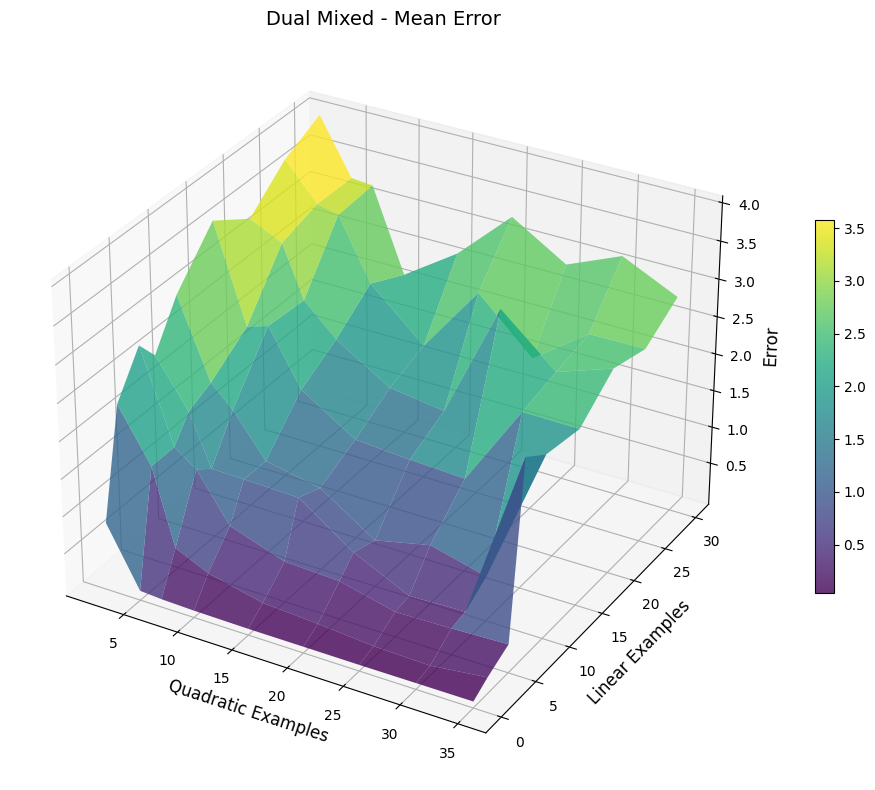

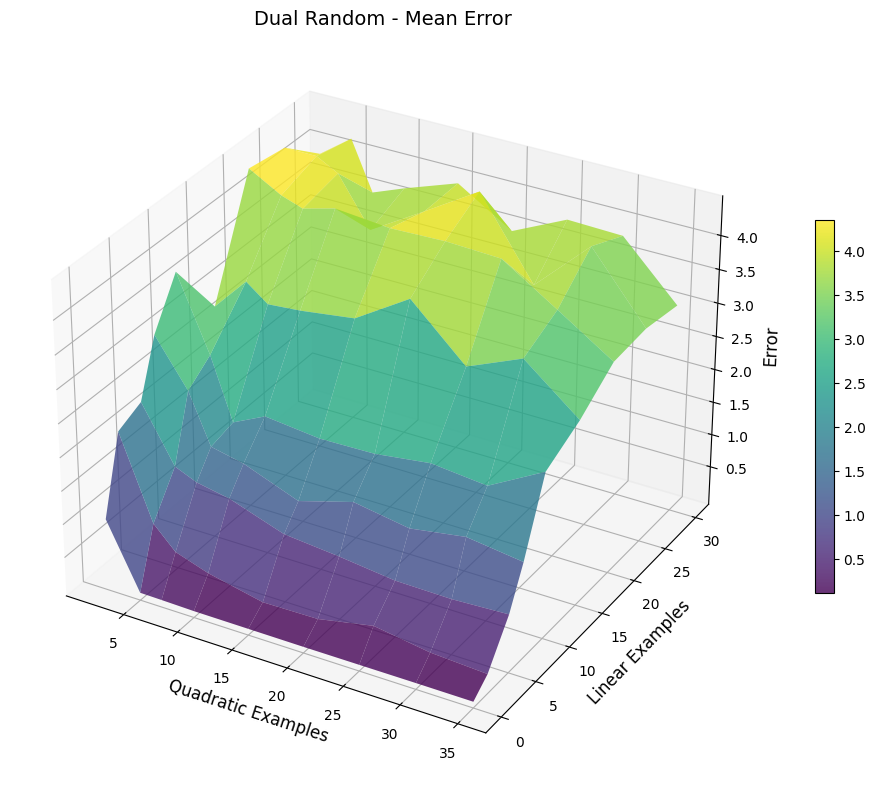

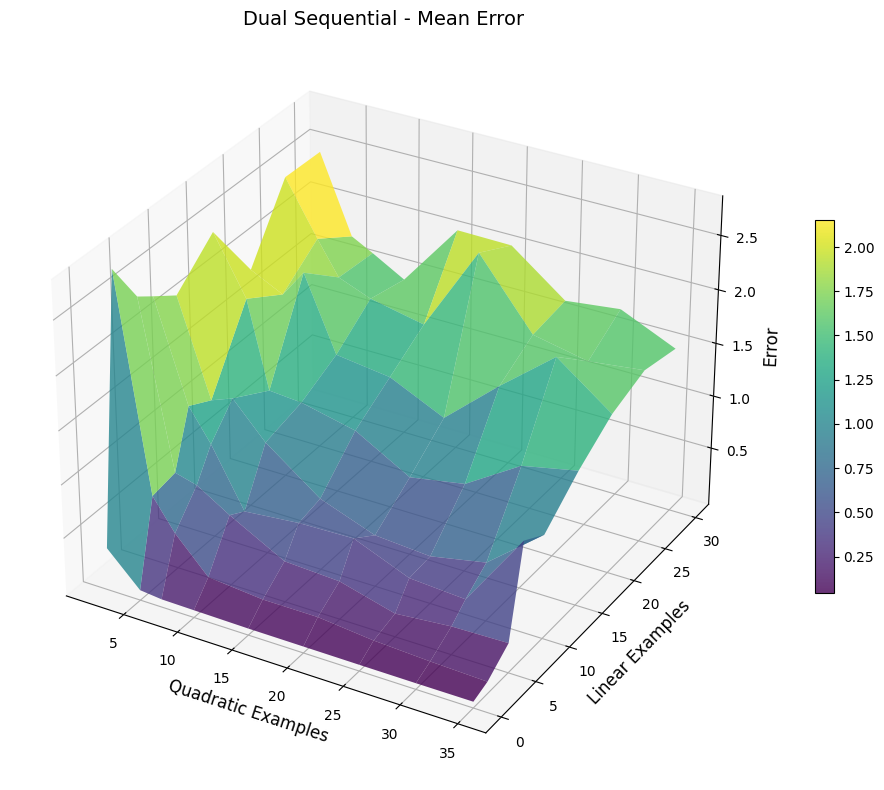

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface(df, title='3D Error Surface'):
    """
    Plot a 3D surface where:
    - X axis = quadratic examples (column names)
    - Y axis = linear examples (row index)
    - Z axis = error values
    """
    # Get the data
    linear_examples = df.index.values  # Y axis
    quadratic_examples = df.columns.values  # X axis
    
    # Create meshgrid
    X, Y = np.meshgrid(quadratic_examples, linear_examples)
    
    # Get Z values (errors)
    Z = df.values
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
    
    # Labels
    ax.set_xlabel('Quadratic Examples', fontsize=12)
    ax.set_ylabel('Linear Examples', fontsize=12)
    ax.set_zlabel('Error', fontsize=12)
    ax.set_title(title, fontsize=14)
    
    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    
    plt.tight_layout()
    plt.show()

# Plot for each dataframe
plot_3d_surface(dual_mixed_mean, 'Dual Mixed - Mean Error')
plot_3d_surface(dual_random_mean, 'Dual Random - Mean Error')
plot_3d_surface(dual_sequential_mean, 'Dual Sequential - Mean Error')

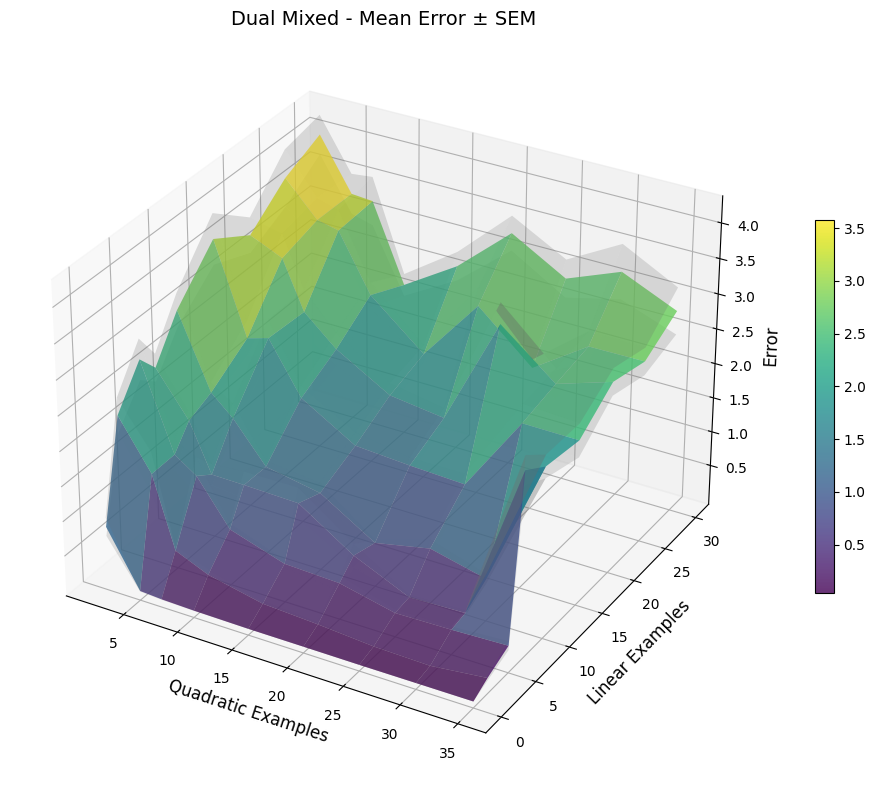

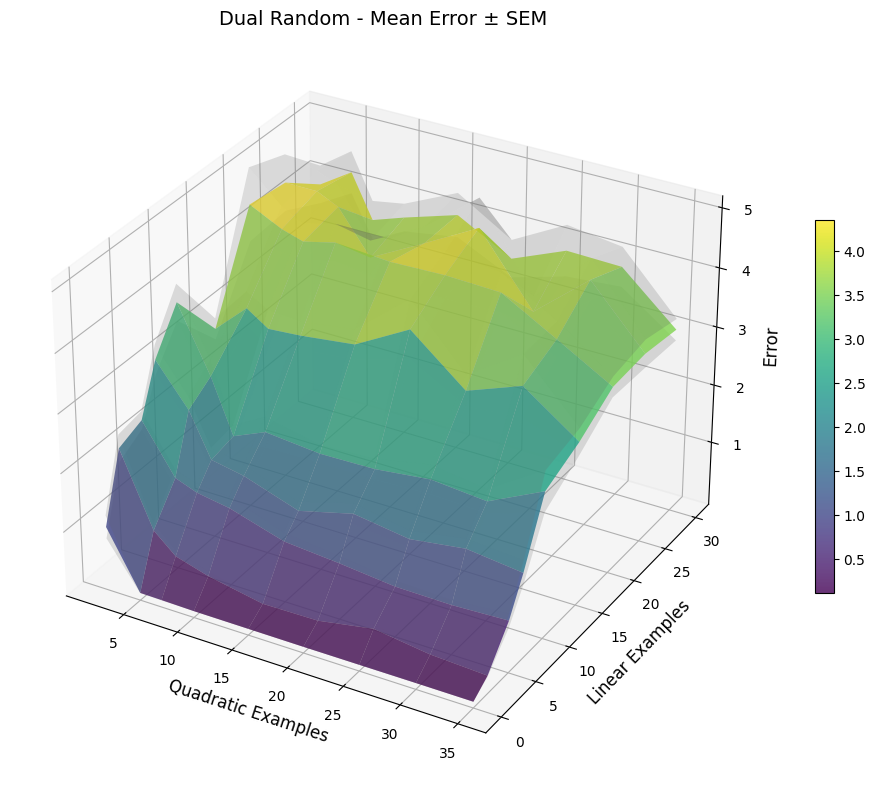

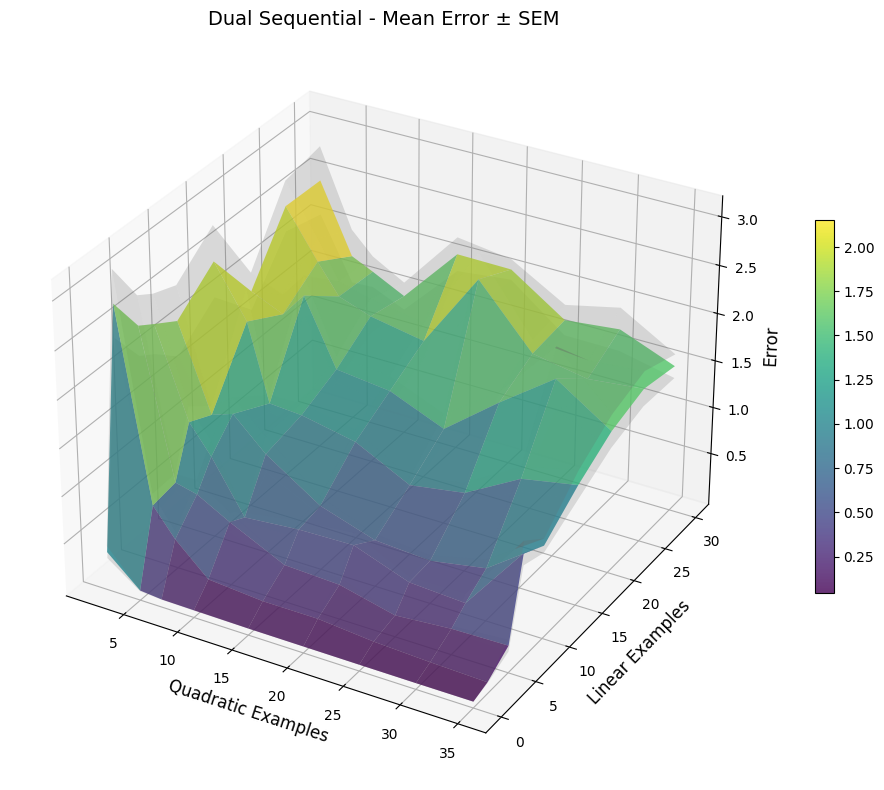

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface_with_error(mean_df, sem_df, title='3D Error Surface with Error Bars'):
    """
    Plot a 3D surface with error bars where:
    - X axis = quadratic examples (column names)
    - Y axis = linear examples (row index)
    - Z axis = error values
    - Error surfaces show mean ± SEM
    """
    # Get the data
    linear_examples = mean_df.index.values  # Y axis
    quadratic_examples = mean_df.columns.values  # X axis
    
    # Create meshgrid
    X, Y = np.meshgrid(quadratic_examples, linear_examples)
    
    # Get Z values
    Z_mean = mean_df.values
    Z_sem = sem_df.values
    
    # Calculate upper and lower bounds
    Z_upper = Z_mean + Z_sem
    Z_lower = Z_mean - Z_sem
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot error surfaces (upper and lower bounds) with transparency
    ax.plot_surface(X, Y, Z_upper, alpha=0.2, color='gray', label='Mean + SEM')
    ax.plot_surface(X, Y, Z_lower, alpha=0.2, color='gray', label='Mean - SEM')
    
    # Plot main surface (mean)
    surf = ax.plot_surface(X, Y, Z_mean, cmap='viridis', alpha=0.8, edgecolor='none')
    
    # Labels
    ax.set_xlabel('Quadratic Examples', fontsize=12)
    ax.set_ylabel('Linear Examples', fontsize=12)
    ax.set_zlabel('Error', fontsize=12)
    ax.set_title(title, fontsize=14)
    
    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    
    plt.tight_layout()
    plt.show()

# Plot for each pair
plot_3d_surface_with_error(dual_mixed_mean, dual_mixed_sem, 'Dual Mixed - Mean Error ± SEM')
plot_3d_surface_with_error(dual_random_mean, dual_random_sem, 'Dual Random - Mean Error ± SEM')
plot_3d_surface_with_error(dual_sequential_mean, dual_sequential_sem, 'Dual Sequential - Mean Error ± SEM')

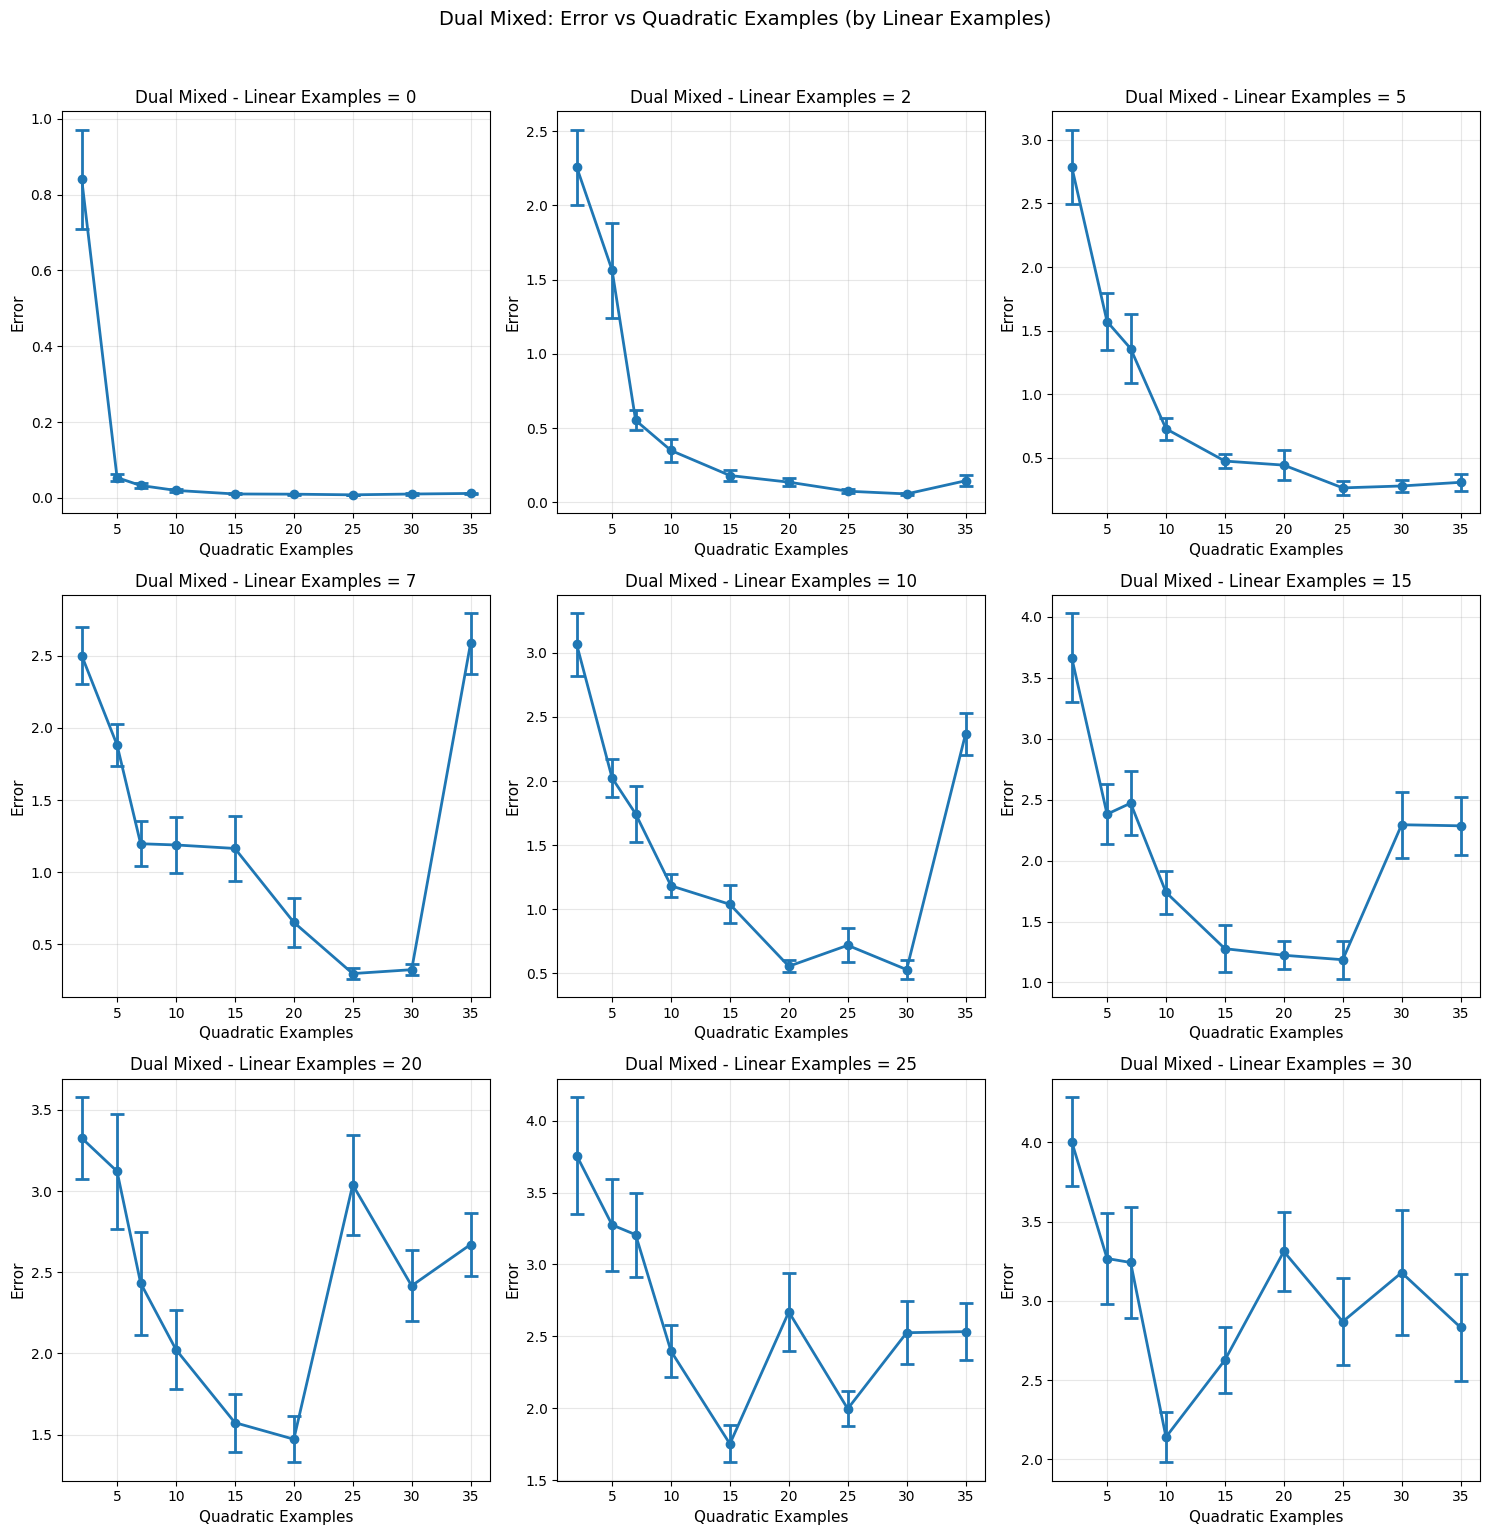

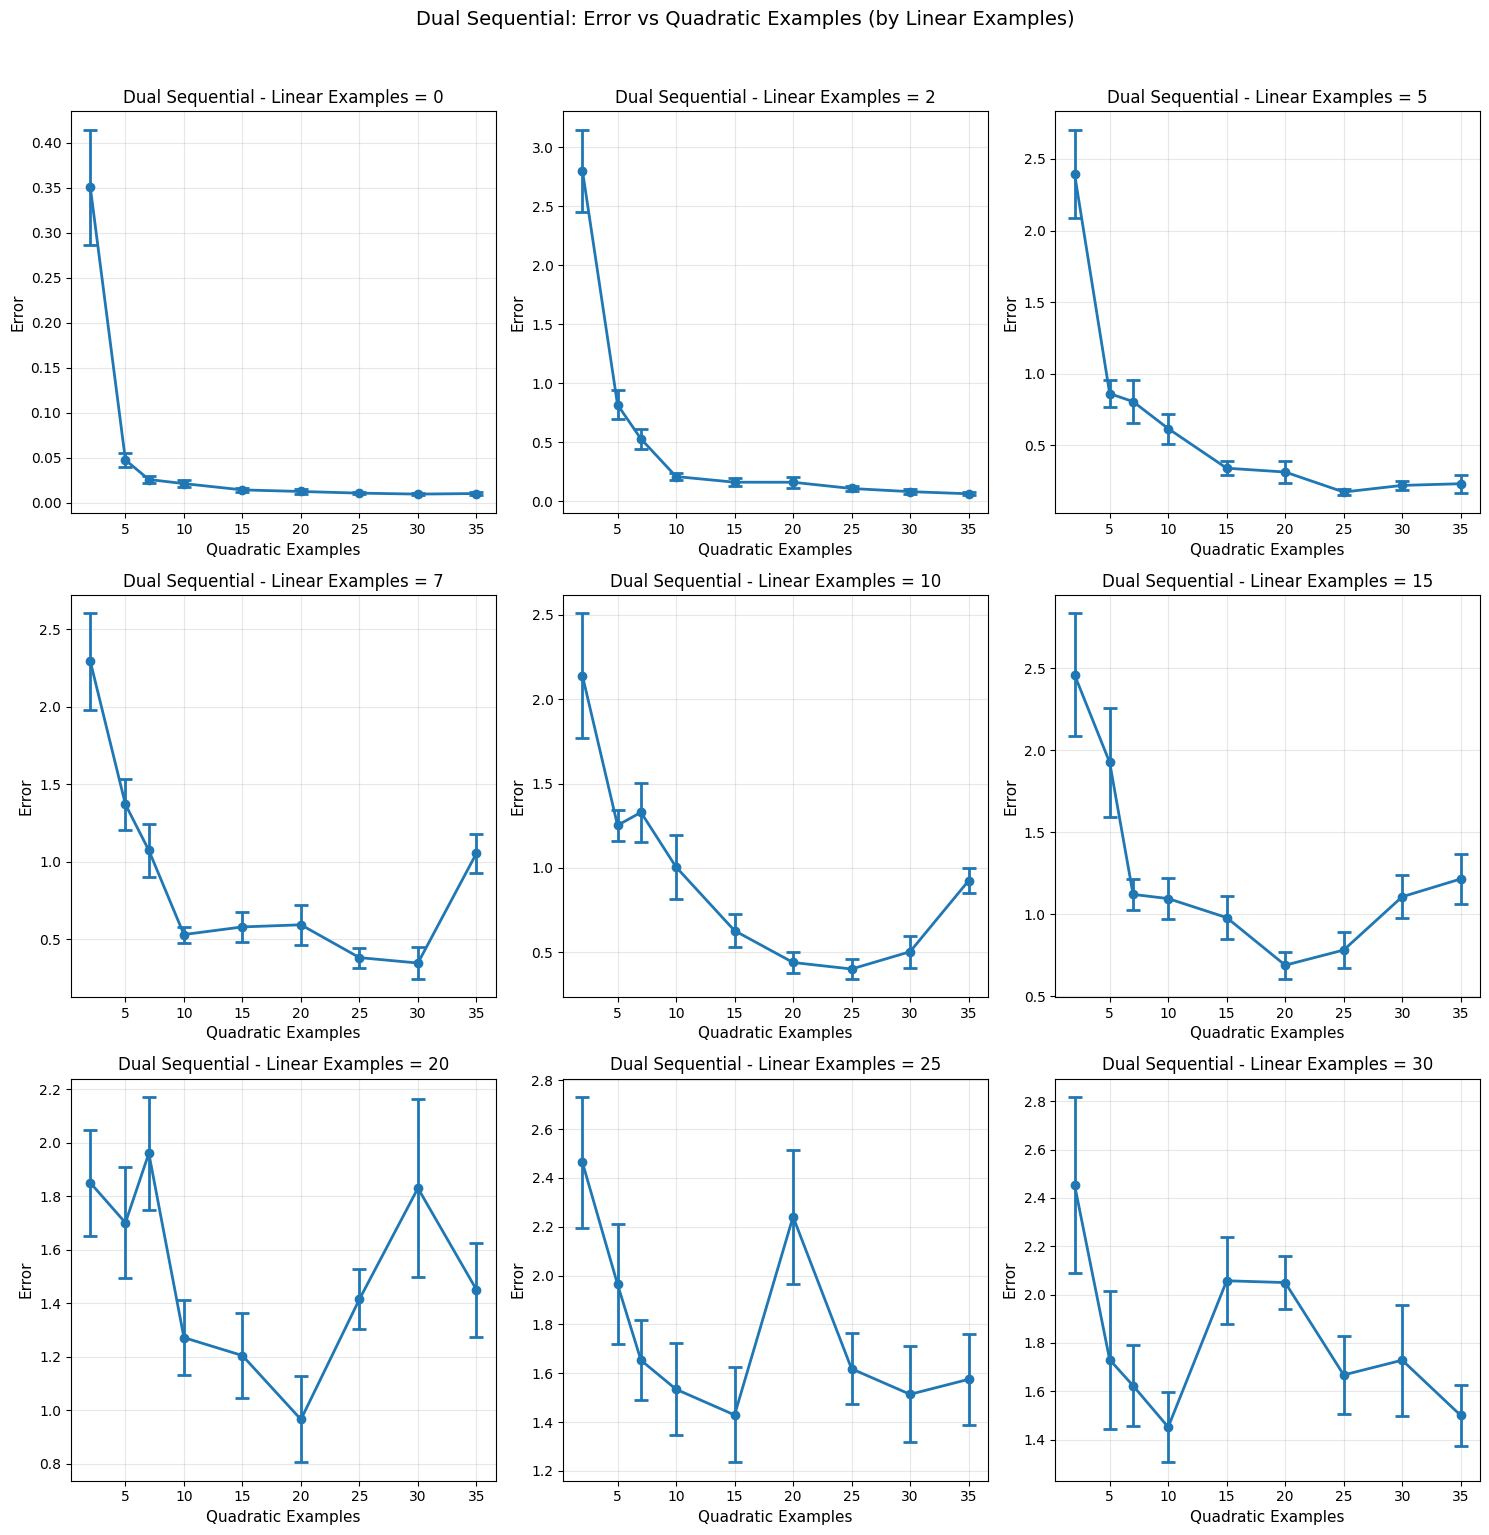

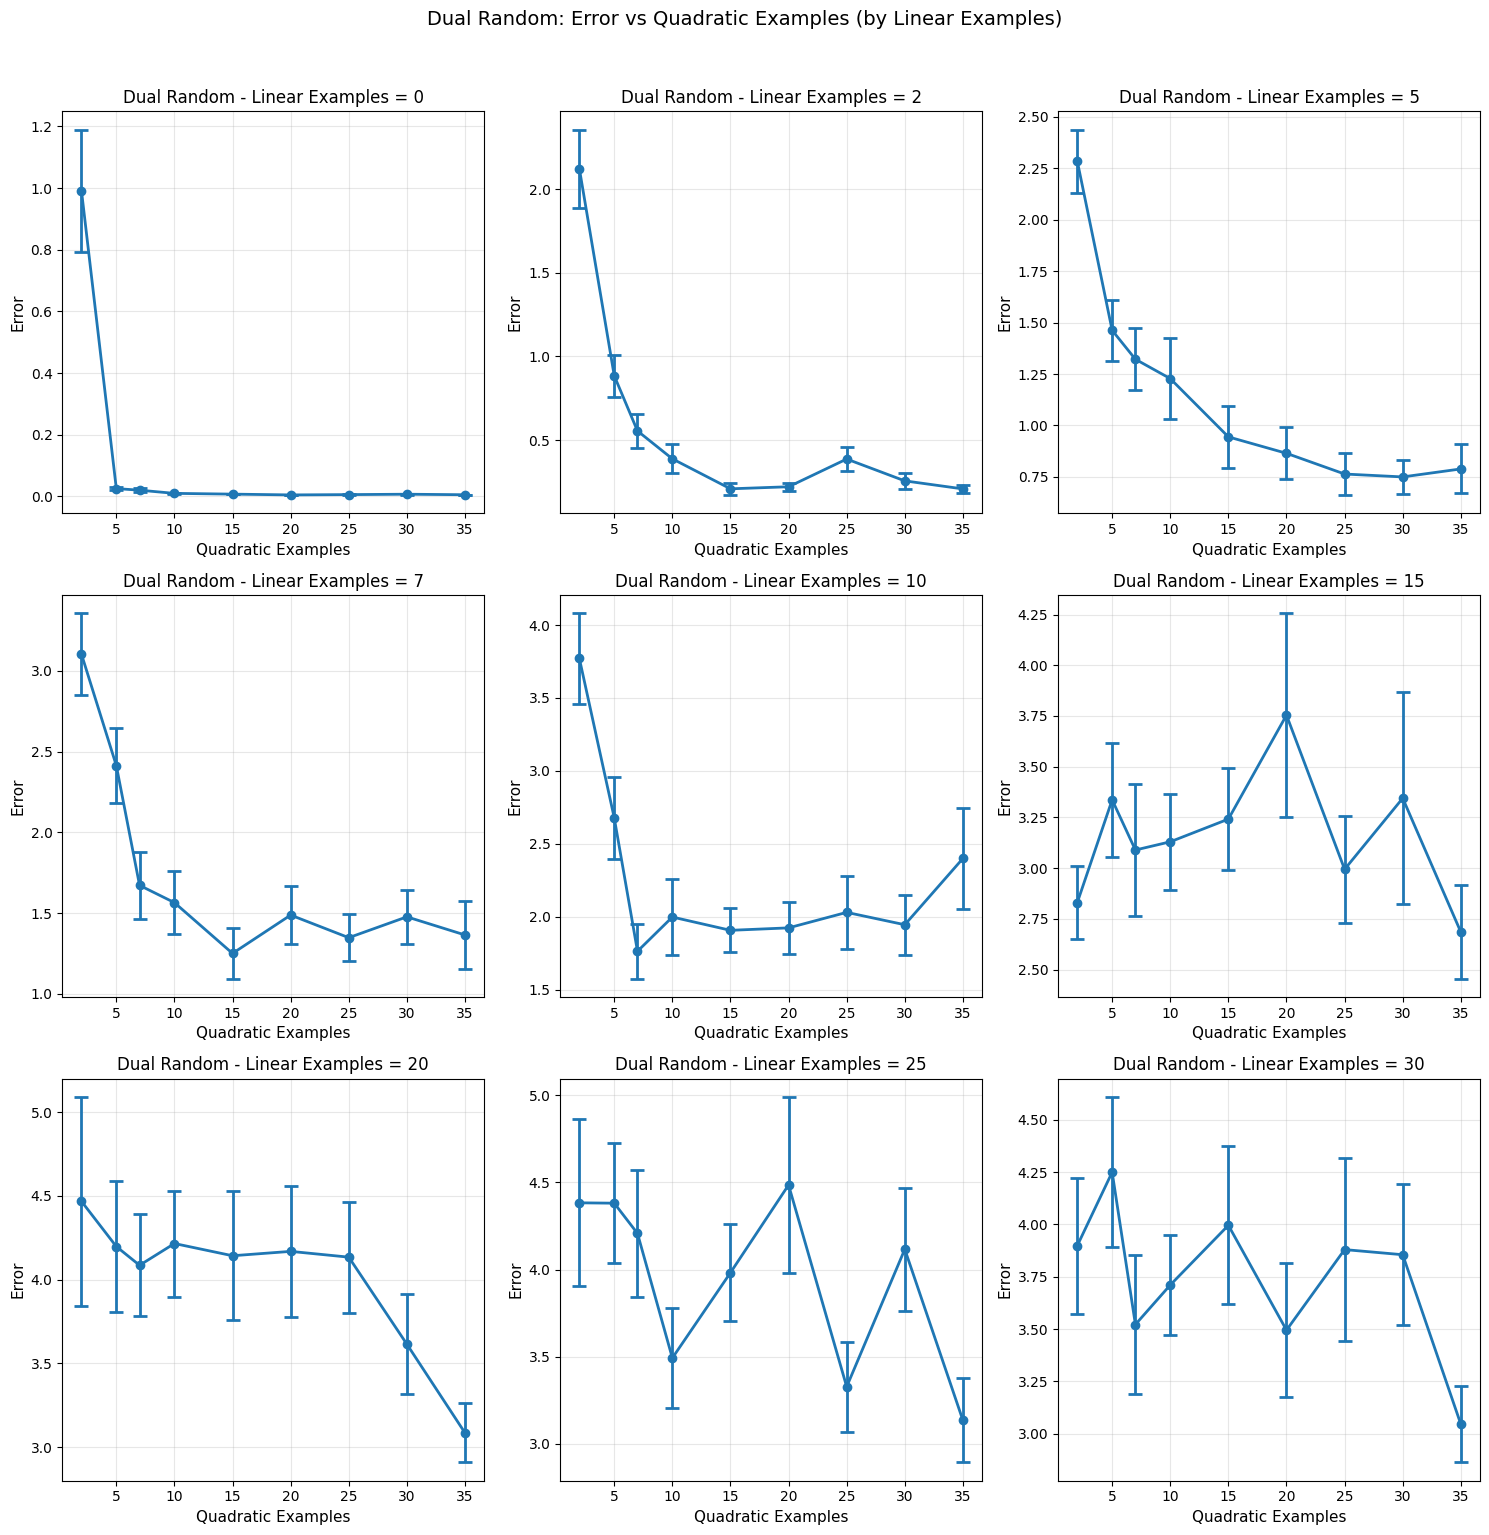

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot all three datasets side by side
datasets = [
    (dual_mixed_mean, dual_mixed_sem, 'Dual Mixed'),
    (dual_sequential_mean, dual_sequential_sem, 'Dual Sequential'),
    (dual_random_mean, dual_random_sem, 'Dual Random')
]

linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values
n_plots = len(linear_examples)

for dataset_mean, dataset_sem, dataset_name in datasets:
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    for idx, n_linear in enumerate(linear_examples):
        ax = axes[idx]
        
        mean_values = dataset_mean.loc[n_linear].values
        sem_values = dataset_sem.loc[n_linear].values
        
        ax.errorbar(quadratic_examples, mean_values, yerr=sem_values, 
                    marker='o', capsize=5, capthick=2, linewidth=2, markersize=6)
        
        ax.set_xlabel('Quadratic Examples', fontsize=11)
        ax.set_ylabel('Error', fontsize=11)
        ax.set_title(f'{dataset_name} - Linear Examples = {n_linear}', fontsize=12)
        ax.grid(True, alpha=0.3)
    
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'{dataset_name}: Error vs Quadratic Examples (by Linear Examples)', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

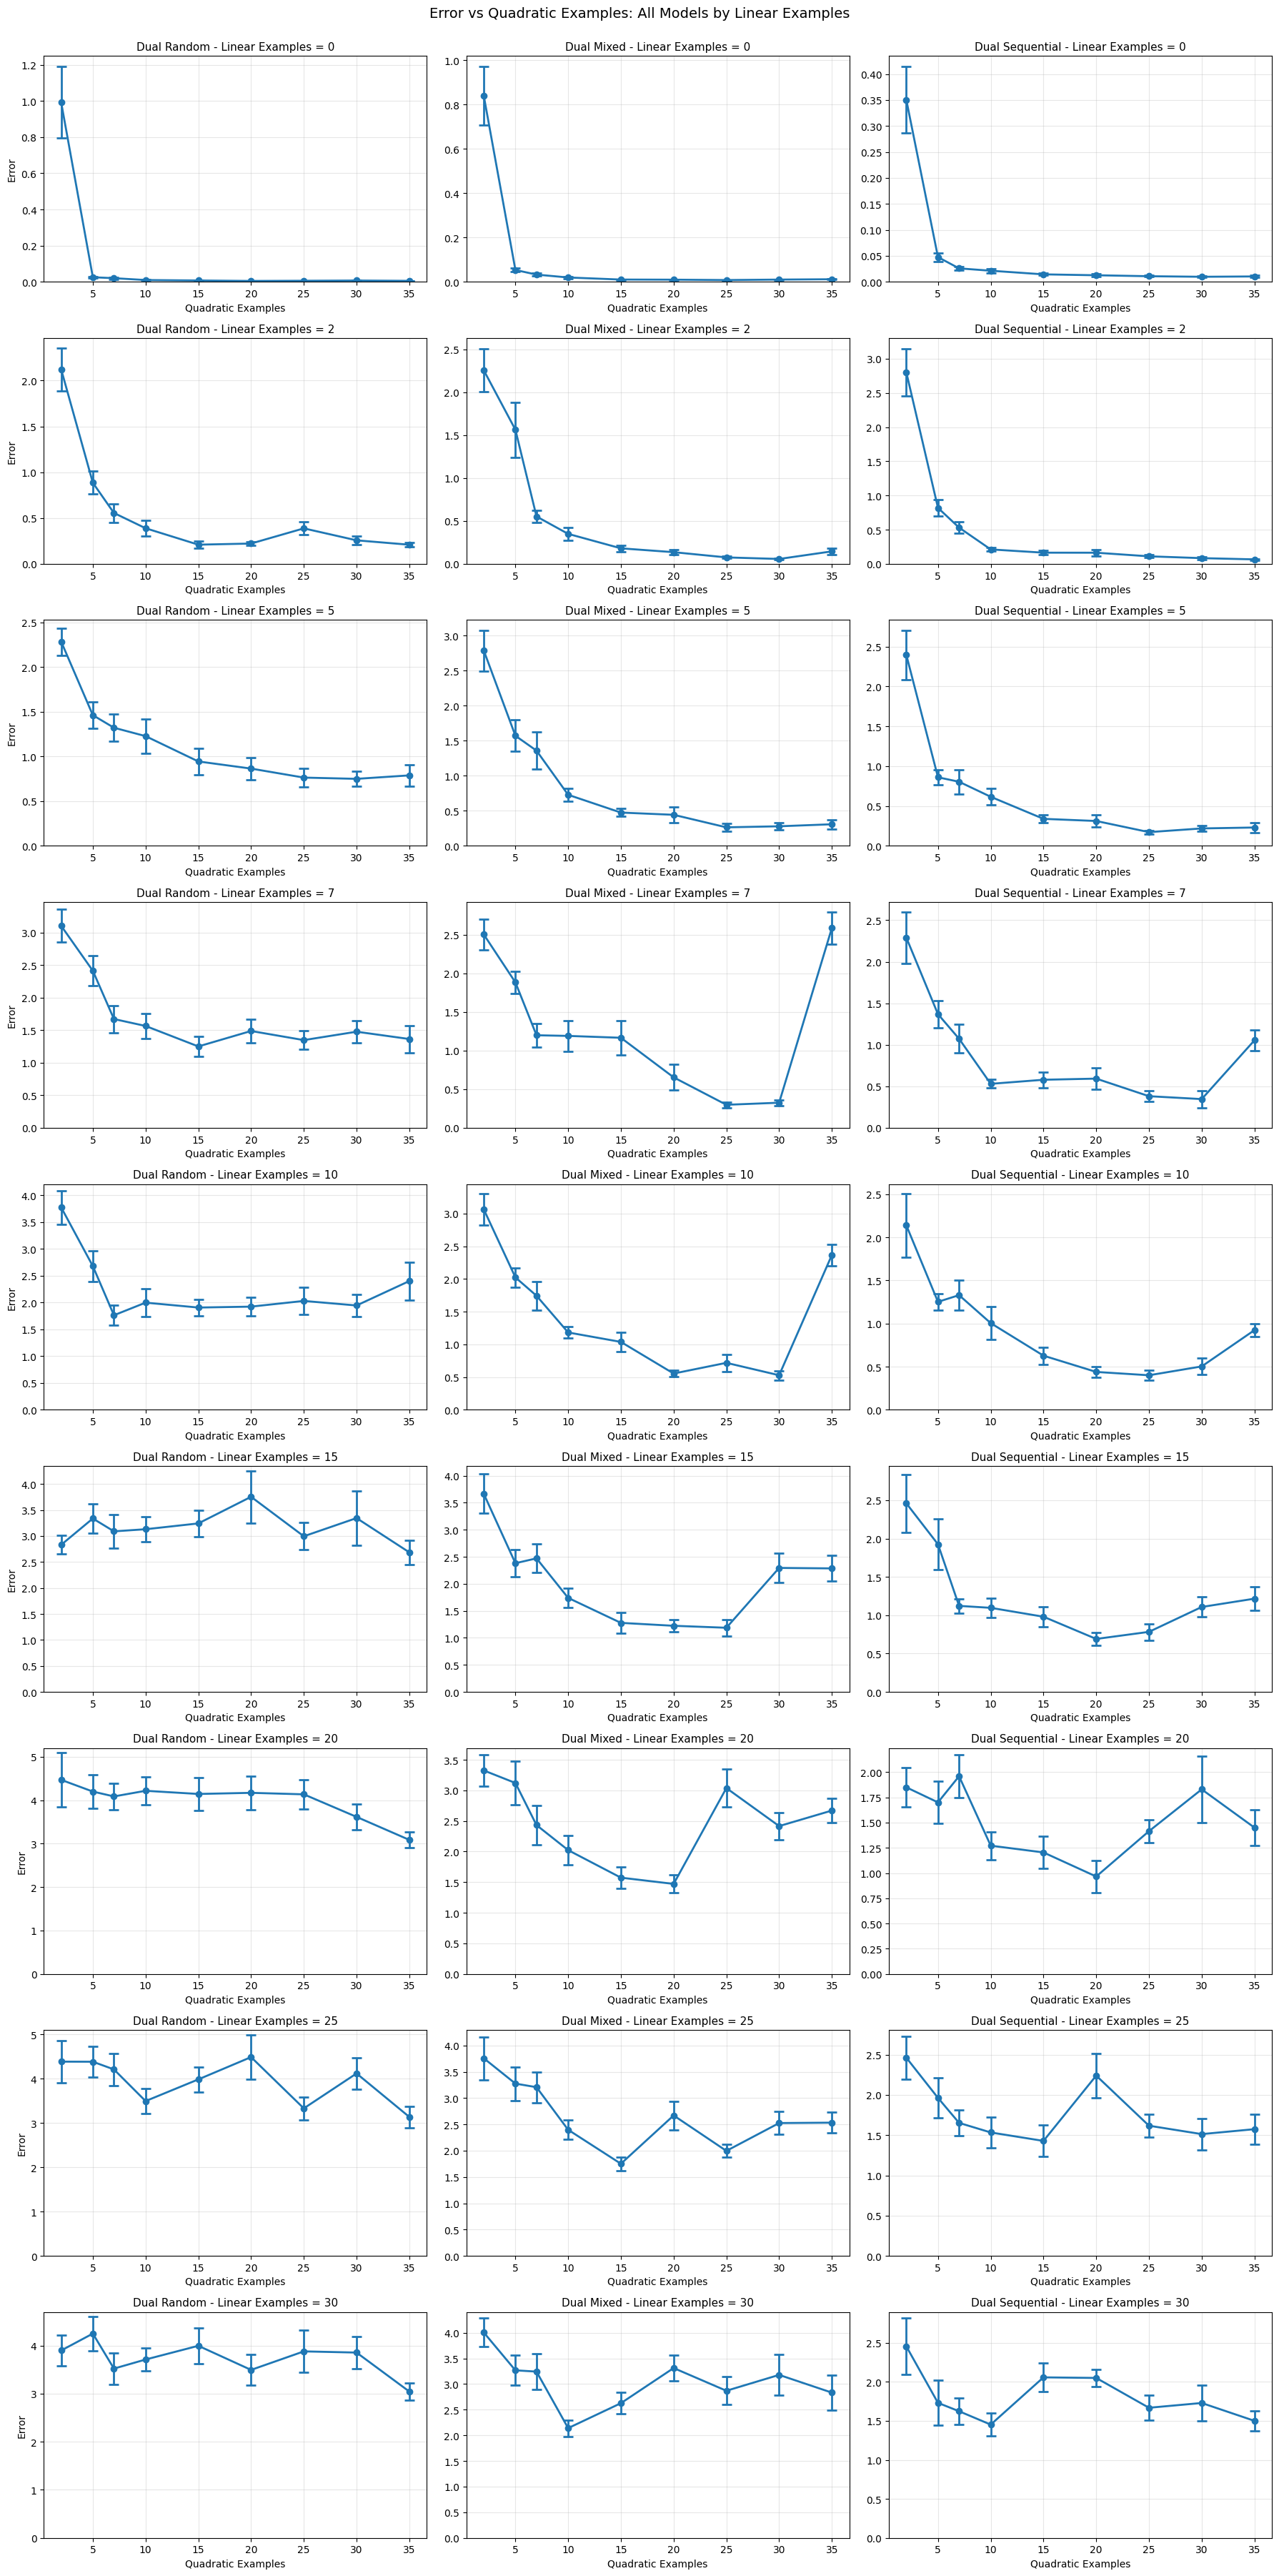

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot layout: each row = one linear example count, 3 columns = 3 models
linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values

n_rows = len(linear_examples)
n_cols = 3  # One for each model

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))

# If only one row, make sure axes is 2D
if n_rows == 1:
    axes = axes.reshape(1, -1)

# Order: dual_random, dual_mixed, dual_sequential
datasets = [
    (dual_random_mean, dual_random_sem, 'Dual Random'),
    (dual_mixed_mean, dual_mixed_sem, 'Dual Mixed'),
    (dual_sequential_mean, dual_sequential_sem, 'Dual Sequential')
]

for row_idx, n_linear in enumerate(linear_examples):
    for col_idx, (mean_df, sem_df, name) in enumerate(datasets):
        ax = axes[row_idx, col_idx]
        
        mean_values = mean_df.loc[n_linear].values
        sem_values = sem_df.loc[n_linear].values
        
        ax.errorbar(quadratic_examples, mean_values, yerr=sem_values, 
                    marker='o', capsize=5, capthick=2, linewidth=2, markersize=6)
        
        ax.set_xlabel('Quadratic Examples', fontsize=10)
        if col_idx == 0:  # Only label y-axis on leftmost plots
            ax.set_ylabel('Error', fontsize=10)
        ax.set_title(f'{name} - Linear Examples = {n_linear}', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(bottom=0)  # Start y-axis at 0

plt.suptitle('Error vs Quadratic Examples: All Models by Linear Examples', 
             fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

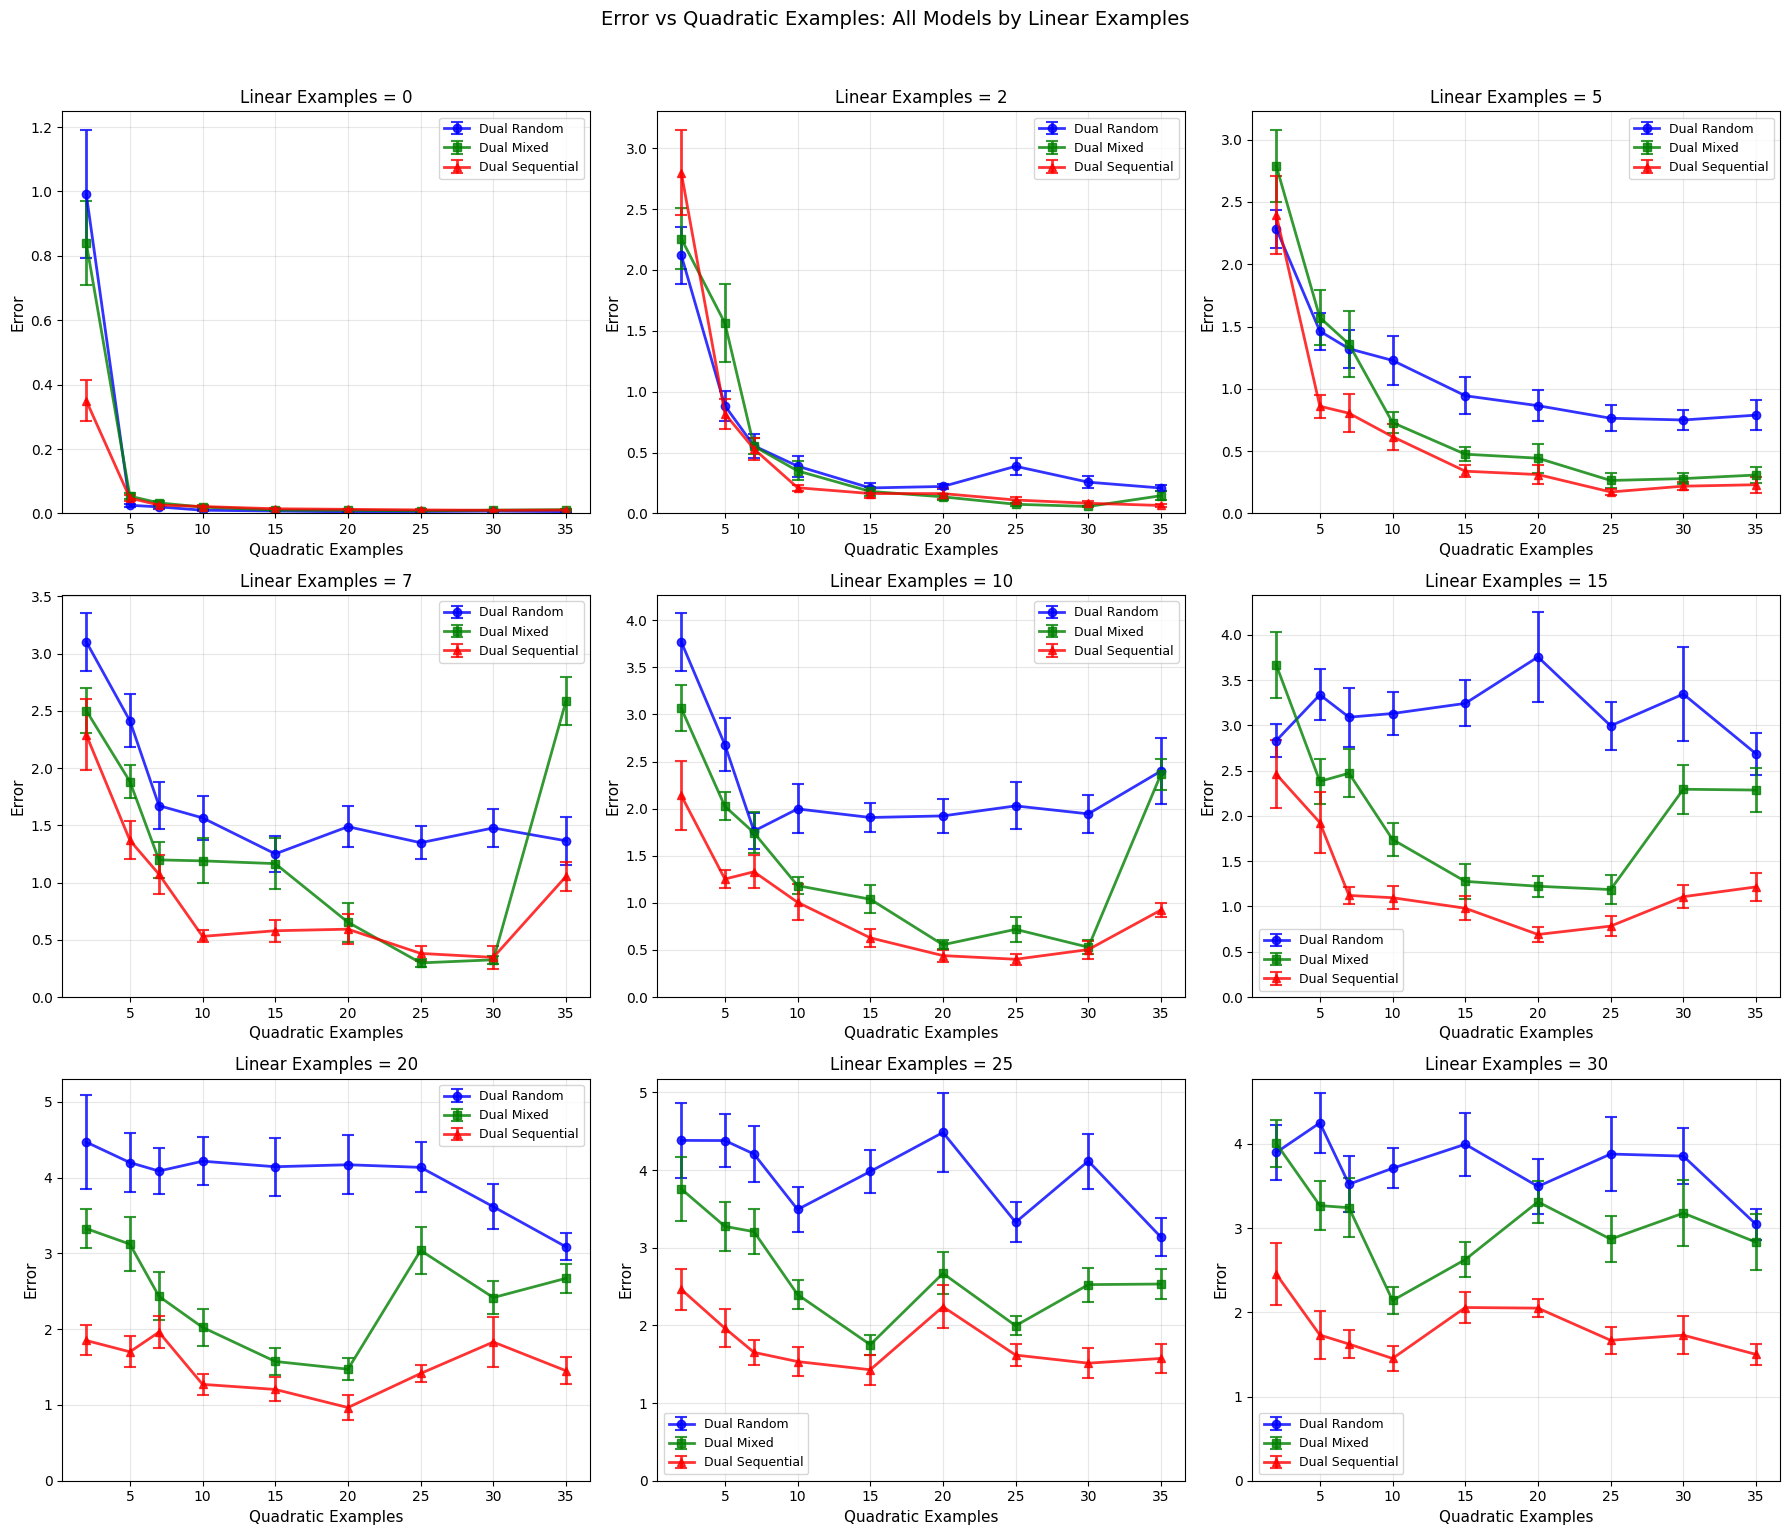

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plot one graph per linear example count, all three models on each
linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values

n_plots = len(linear_examples)
n_cols = 3  # Number of columns in subplot grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_plots > 1 else [axes]

# Colors and markers for each model
model_styles = {
    'Dual Random': {'color': 'blue', 'marker': 'o'},
    'Dual Mixed': {'color': 'green', 'marker': 's'},
    'Dual Sequential': {'color': 'red', 'marker': '^'}
}

datasets = [
    (dual_random_mean, dual_random_sem, 'Dual Random'),
    (dual_mixed_mean, dual_mixed_sem, 'Dual Mixed'),
    (dual_sequential_mean, dual_sequential_sem, 'Dual Sequential')
]

for idx, n_linear in enumerate(linear_examples):
    ax = axes[idx]
    
    # Plot all three models on this subplot
    for mean_df, sem_df, model_name in datasets:
        mean_values = mean_df.loc[n_linear].values
        sem_values = sem_df.loc[n_linear].values
        style = model_styles[model_name]
        
        ax.errorbar(quadratic_examples, mean_values, yerr=sem_values, 
                    marker=style['marker'], capsize=4, capthick=1.5, 
                    linewidth=2, markersize=6, label=model_name, 
                    color=style['color'], alpha=0.8)
    
    ax.set_xlabel('Quadratic Examples', fontsize=11)
    ax.set_ylabel('Error', fontsize=11)
    ax.set_title(f'Linear Examples = {n_linear}', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(bottom=0)
    ax.legend(fontsize=9)
    
# Hide unused subplots
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Error vs Quadratic Examples: All Models by Linear Examples', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()